In [ ]:
! pip install ortools
! pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [1]:
# Pickup VRP Data

# Time matrix representing travel times between locations for pickup operations
pickup_time_matrix = [
    [0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7],
    [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14],
    [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9],
    [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16],
    [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14],
    [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8],
    [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5],
    [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10],
    [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6],
    [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5],
    [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4],
    [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10],
    [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8],
    [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6],
    [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2],
    [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9],
    [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0],
]

# Time window limits for each pickup location (start, end) in minutes
pickup_time_windows = [
    (0, 60), (7, 30), (10, 40), (16, 50), (10, 30), (0, 40), (5, 60),
    (0, 50), (5, 50), (0, 30), (10, 40), (10, 15), (0, 5), (5, 10),
    (7, 8), (10, 15), (11, 15),
]

# Pickup demand (load) for each location; depot has a demand of 0
pickup_demands = [0, 1, 1, 2, 4, 2, 4, 8, 3, 1, 2, 1, 2, 4, 4, 5, 5]

# Number of vehicles available for pickup operations
pickup_num_vehicles = 4

# Maximum load capacities for each pickup vehicle
pickup_vehicle_capacities = [20, 20, 20, 20]

# Index representing the depot location for pickup
depot_index = 0

# Delivery VRP Data

# Time matrix representing travel times between locations for delivery operations
delivery_time_matrix = [
    [0, 4, 8, 6, 10, 7, 9, 11, 5, 6, 7, 8, 9, 10, 7, 12, 13, 11, 9, 8, 6],
    [4, 0, 5, 9, 7, 3, 6, 8, 4, 5, 6, 7, 8, 9, 6, 9, 10, 9, 7, 6, 5],
    [8, 5, 0, 4, 6, 6, 3, 7, 2, 3, 4, 5, 6, 7, 5, 6, 8, 7, 6, 5, 3],
    [6, 9, 4, 0, 3, 5, 6, 4, 3, 4, 5, 6, 7, 8, 6, 5, 7, 6, 5, 4, 4],
    [10, 7, 6, 3, 0, 2, 4, 5, 5, 6, 7, 8, 9, 10, 8, 7, 9, 8, 7, 6, 6],
    [7, 3, 6, 5, 2, 0, 2, 4, 4, 5, 6, 7, 8, 9, 6, 5, 7, 6, 5, 4, 4],
    [9, 6, 3, 6, 4, 2, 0, 3, 2, 3, 4, 5, 6, 7, 4, 4, 6, 5, 4, 3, 3],
    [11, 8, 7, 4, 5, 4, 3, 0, 3, 4, 5, 6, 7, 8, 6, 5, 7, 6, 5, 4, 5],
    [5, 4, 2, 3, 5, 4, 2, 3, 0, 2, 3, 4, 5, 6, 3, 3, 5, 4, 3, 2, 2],
    [6, 5, 3, 4, 6, 5, 3, 4, 2, 0, 2, 3, 4, 5, 3, 4, 6, 5, 4, 3, 3],
    [7, 6, 4, 5, 7, 6, 4, 5, 3, 2, 0, 1, 2, 3, 1, 3, 5, 4, 3, 2, 2],
    [8, 7, 5, 6, 8, 7, 5, 6, 4, 3, 1, 0, 1, 2, 2, 2, 4, 3, 2, 1, 1],
    [9, 8, 6, 7, 9, 8, 6, 7, 5, 4, 2, 1, 0, 1, 3, 1, 3, 2, 1, 2, 2],
    [10, 9, 7, 8, 10, 9, 7, 8, 6, 5, 3, 2, 1, 0, 4, 2, 2, 1, 2, 3, 3],
    [7, 6, 5, 6, 8, 6, 4, 6, 3, 3, 1, 2, 3, 4, 0, 3, 5, 4, 3, 2, 2],
    [12, 9, 6, 5, 7, 5, 4, 5, 3, 4, 3, 2, 1, 2, 3, 0, 2, 3, 4, 5, 6],
    [13, 10, 8, 7, 9, 7, 6, 7, 5, 6, 5, 4, 3, 2, 5, 2, 0, 1, 2, 3, 4],
    [11, 9, 7, 6, 8, 6, 5, 6, 4, 5, 4, 3, 2, 1, 4, 3, 1, 0, 1, 2, 3],
    [9, 7, 6, 5, 7, 5, 4, 5, 3, 4, 3, 2, 1, 2, 3, 4, 2, 1, 0, 1, 2],
    [8, 6, 5, 4, 6, 4, 3, 4, 2, 3, 2, 1, 2, 3, 2, 5, 3, 2, 1, 0, 1],
    [6, 5, 3, 4, 6, 4, 3, 5, 2, 3, 2, 1, 2, 3, 2, 6, 4, 3, 2, 1, 0],
]

# Time window limits for each delivery location (start, end) in minutes
delivery_time_windows = [
    (0, 30), (2, 10), (5, 12), (10, 20), (15, 25), (7, 18), (0, 25), (5, 15), (3, 12), (1, 10),
    (6, 14), (7, 13), (0, 12), (5, 15), (4, 12), (3, 10), (6, 11), (7, 13), (5, 10), (3, 9), (4, 10)
]

# Delivery demand (load) for each location; depot has a demand of 0
delivery_demands = [0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1]

# Maximum load capacities available for each delivery vehicle
delivery_vehicle_capacities = [7, 7, 7, 7, 7]

# Number of vehicles available for delivery operations
delivery_num_vehicles = 5

In [3]:
# Importing libraries
import pandas as pd
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np
import copy

In [4]:
def solve_pickup_vrp():

    # Problem data
    data = {
        'time_matrix': pickup_time_matrix,
        'time_windows': pickup_time_windows,
        'num_vehicles': pickup_num_vehicles,
        'demands': pickup_demands,
        'vehicle_capacities': pickup_vehicle_capacities,
        'depot': depot_index
    }

    # Setup routing
    manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    # Travel time callback
    def time_callback(from_index, to_index):
        return data['time_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]
    transit_index = routing.RegisterTransitCallback(time_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_index)

    # Demand callback
    def demand_callback(from_index):
        return data['demands'][manager.IndexToNode(from_index)]
    demand_index = routing.RegisterUnaryTransitCallback(demand_callback)

    # Add constraints
    routing.AddDimensionWithVehicleCapacity(demand_index, 0, data['vehicle_capacities'], True, 'Capacity')
    routing.AddDimension(transit_index, 30, 30, False, 'Time')
    time_dimension = routing.GetDimensionOrDie('Time')

    # Time windows for each location
    for loc_idx, (start, end) in enumerate(data['time_windows']):
        if loc_idx == 0: continue
        index = manager.NodeToIndex(loc_idx)
        time_dimension.CumulVar(index).SetRange(start, end)

    # Time windows at depot for each vehicle
    for vehicle_id in range(data['num_vehicles']):
        start_index = routing.Start(vehicle_id)
        end_index = routing.End(vehicle_id)
        time_dimension.CumulVar(start_index).SetRange(*data['time_windows'][0])
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(start_index))
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(end_index))

    # Define search strategy
    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    search_params.time_limit.seconds = 10

    # Solve
    solution = routing.SolveWithParameters(search_params)
    pickup_rows = []

    if solution:
        print("\n--- PICKUP SOLUTION ---")
        overall_total_load = 0
        overall_total_time = 0

        # Process each vehicle route
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route_load = 0
            print(f"\nRoute for vehicle {vehicle_id+1}:")
            while not routing.IsEnd(index):
                node = manager.IndexToNode(index)
                time_var = time_dimension.CumulVar(index)
                route_load += data['demands'][node]
                print(f"Place {node:2} Arrive at {solution.Min(time_var):2}min (Load {route_load:2})")
                pickup_rows.append({
                    'Vehicle': vehicle_id + 1,
                    'Route': vehicle_id + 1,
                    'Place': node,
                    'ArrivalTime': solution.Min(time_var),
                    'Load': route_load
                })
                index = solution.Value(routing.NextVar(index))

            # End of route
            end_node = manager.IndexToNode(index)
            end_time = time_dimension.CumulVar(index)
            vehicle_time = solution.Min(end_time)
            print(f"Place {end_node:2} Arrive at {vehicle_time}min")
            print(f"Load of the route: {route_load}")
            print(f"Time of the route: {vehicle_time}min")
            print(f"----------------------")
            overall_total_load += route_load
            overall_total_time += vehicle_time
            pickup_rows.append({
                'Vehicle': vehicle_id + 1,
                'Route': vehicle_id + 1,
                'Place': end_node,
                'ArrivalTime': vehicle_time,
                'Load': route_load
            })

        print("\n*** OVERALL PICKUP SUMMARY ***")
        print(f"Total Load: {overall_total_load}")
        print(f"Total Pickup Time: {overall_total_time}min")

    return pd.DataFrame(pickup_rows)

In [5]:
# Solve the pickup VRP and export results to a CSV file
pickup_df = solve_pickup_vrp()
pickup_df.to_csv("pickup_routes.csv", index=False)


--- PICKUP SOLUTION ---

Route for vehicle 1:
Place  0 Arrive at  0min (Load  0)
Place  7 Arrive at  2min (Load  8)
Place  5 Arrive at  5min (Load 10)
Place  0 Arrive at 8min
Load of the route: 10
Time of the route: 8min
----------------------

Route for vehicle 2:
Place  0 Arrive at  0min (Load  0)
Place  0 Arrive at 0min
Load of the route: 0
Time of the route: 0min
----------------------

Route for vehicle 3:
Place  0 Arrive at  0min (Load  0)
Place 12 Arrive at  4min (Load  2)
Place 13 Arrive at  6min (Load  6)
Place 15 Arrive at 11min (Load 11)
Place 11 Arrive at 14min (Load 12)
Place  4 Arrive at 18min (Load 16)
Place  3 Arrive at 19min (Load 18)
Place  1 Arrive at 22min (Load 19)
Place  0 Arrive at 28min
Load of the route: 19
Time of the route: 28min
----------------------

Route for vehicle 4:
Place  0 Arrive at  0min (Load  0)
Place  9 Arrive at  2min (Load  1)
Place 14 Arrive at  7min (Load  5)
Place 16 Arrive at 11min (Load 10)
Place 10 Arrive at 15min (Load 12)
Place  2 Arr

In [6]:
def solve_delivery_vrp():

    # Set up problem data
    data = {
        'time_matrix': delivery_time_matrix,
        'time_windows': delivery_time_windows,
        'num_vehicles': delivery_num_vehicles,
        'demands': delivery_demands,
        'vehicle_capacities': delivery_vehicle_capacities,
        'depot': depot_index
    }

    # Create routing manager and model
    manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    # Define travel time between nodes
    def time_callback(from_index, to_index):
        return data['time_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]
    transit_index = routing.RegisterTransitCallback(time_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_index)

    # Define delivery demand at each node
    def demand_callback(from_index):
        return data['demands'][manager.IndexToNode(from_index)]
    demand_index = routing.RegisterUnaryTransitCallback(demand_callback)

    # Add vehicle capacity and time window constraints
    routing.AddDimensionWithVehicleCapacity(demand_index, 0, data['vehicle_capacities'], True, 'Capacity')
    routing.AddDimension(transit_index, 30, 30, False, 'Time')
    time_dimension = routing.GetDimensionOrDie('Time')

    # Apply time windows to all nodes (except depot)
    for loc_idx, (start, end) in enumerate(data['time_windows']):
        if loc_idx == 0: continue
        index = manager.NodeToIndex(loc_idx)
        time_dimension.CumulVar(index).SetRange(start, end)

    # Apply time windows to depot for all vehicles
    for vehicle_id in range(data['num_vehicles']):
        start_index = routing.Start(vehicle_id)
        end_index = routing.End(vehicle_id)
        time_dimension.CumulVar(start_index).SetRange(*data['time_windows'][0])
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(start_index))
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(end_index))

    # Configure search strategy
    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    search_params.time_limit.seconds = 10

    # Solve the problem
    solution = routing.SolveWithParameters(search_params)
    delivery_rows = []

    if solution:
        print("\n--- DELIVERY SOLUTION ---")
        overall_total_load = 0
        overall_total_time = 0

        # Process each vehicle's route
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route_load = 0
            route_nodes = []

            # Calculate total load for the route
            while not routing.IsEnd(index):
                node = manager.IndexToNode(index)
                route_nodes.append(node)
                route_load += data['demands'][node]
                index = solution.Value(routing.NextVar(index))
            total_load = route_load

            # Traverse route again to show remaining load
            index = routing.Start(vehicle_id)
            curr_load = 0
            print(f"\nRoute for vehicle {vehicle_id+1}:")
            while not routing.IsEnd(index):
                node = manager.IndexToNode(index)
                time_var = time_dimension.CumulVar(index)
                curr_load += data['demands'][node]
                remaining_load = total_load - curr_load
                print(f"Place {node:2} Arrive at {solution.Min(time_var):2}min (Remaining {remaining_load:2})")
                delivery_rows.append({
                    'Vehicle': vehicle_id + 1,
                    'Route': vehicle_id + 1,
                    'Place': node,
                    'ArrivalTime': solution.Min(time_var),
                    'RemainingLoad': remaining_load
                })
                index = solution.Value(routing.NextVar(index))

            # End of route
            end_node = manager.IndexToNode(index)
            end_time = time_dimension.CumulVar(index)
            vehicle_time = solution.Min(end_time)
            print(f"Place {end_node:2} Arrive at {vehicle_time}min")
            print(f"Total Load: {total_load}")
            print(f"Time of the route: {vehicle_time}min")
            print(f"----------------------")
            overall_total_load += total_load
            overall_total_time += vehicle_time
            delivery_rows.append({
                'Vehicle': vehicle_id + 1,
                'Route': vehicle_id + 1,
                'Place': end_node,
                'ArrivalTime': vehicle_time,
                'RemainingLoad': 0
            })

        print("\n*** OVERALL DELIVERY SUMMARY ***")
        print(f"Total Load: {overall_total_load}")
        print(f"Total Delivery Time: {overall_total_time}min")

    return pd.DataFrame(delivery_rows)

In [7]:
# Solve the delivery VRP and export results to a CSV file
delivery_df = solve_delivery_vrp()
delivery_df.to_csv("delivery_routes.csv", index=False)


--- DELIVERY SOLUTION ---

Route for vehicle 1:
Place  0 Arrive at  0min (Remaining  7)
Place 11 Arrive at  8min (Remaining  5)
Place 12 Arrive at  9min (Remaining  4)
Place 15 Arrive at 10min (Remaining  2)
Place  7 Arrive at 15min (Remaining  0)
Place  0 Arrive at 26min
Total Load: 7
Time of the route: 26min
----------------------

Route for vehicle 2:
Place  0 Arrive at  0min (Remaining  0)
Place  0 Arrive at 0min
Total Load: 0
Time of the route: 0min
----------------------

Route for vehicle 3:
Place  0 Arrive at  0min (Remaining  7)
Place 14 Arrive at  7min (Remaining  6)
Place 10 Arrive at  8min (Remaining  5)
Place  9 Arrive at 10min (Remaining  4)
Place  8 Arrive at 12min (Remaining  3)
Place  4 Arrive at 17min (Remaining  2)
Place  3 Arrive at 20min (Remaining  0)
Place  0 Arrive at 26min
Total Load: 7
Time of the route: 26min
----------------------

Route for vehicle 4:
Place  0 Arrive at  0min (Remaining  7)
Place 20 Arrive at  6min (Remaining  6)
Place 19 Arrive at  7min (

In [8]:
# Perform sensitivity analysis by varying a specified parameter and solving the VRP each time
def sensitivity_analysis(base_data, solve_function, param_name, param_values, label):
    print(f"\n===== SENSITIVITY ANALYSIS: {label} =====")
    for val in param_values:
        data = copy.deepcopy(base_data)

        if param_name == 'num_vehicles':
            data['num_vehicles'] = val
            data['vehicle_capacities'] = [base_data['vehicle_capacities'][0]] * val
        elif param_name == 'vehicle_capacities':
            data['vehicle_capacities'] = [val] * base_data['num_vehicles']
        elif param_name == 'time_window_slack':
            data['time_window_slack'] = val  # Only used if your model is modified to include this parameter
        else:
            print(f"Unknown parameter: {param_name}")
            continue

        print(f"\n--- {label} = {val} ---")
        solve_function(data)

In [9]:
# Solve pickup VRP and print total load and total route time (used for sensitivity analysis)
def solve_pickup_vrp(data=None):
    if data is None:
        data = {
            'time_matrix': pickup_time_matrix,
            'time_windows': pickup_time_windows,
            'num_vehicles': pickup_num_vehicles,
            'demands': pickup_demands,
            'vehicle_capacities': pickup_vehicle_capacities,
            'depot': depot_index
        }

    manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def time_callback(from_index, to_index):
        return data['time_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]
    transit_index = routing.RegisterTransitCallback(time_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_index)

    def demand_callback(from_index):
        return data['demands'][manager.IndexToNode(from_index)]
    demand_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(demand_index, 0, data['vehicle_capacities'], True, 'Capacity')

    routing.AddDimension(transit_index, 30, 30, False, 'Time')
    time_dimension = routing.GetDimensionOrDie('Time')

    for loc_idx, (start, end) in enumerate(data['time_windows']):
        if loc_idx == 0: continue
        index = manager.NodeToIndex(loc_idx)
        time_dimension.CumulVar(index).SetRange(start, end)

    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        time_dimension.CumulVar(index).SetRange(*data['time_windows'][0])
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(index))
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(routing.End(vehicle_id)))

    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    search_params.time_limit.seconds = 10

    solution = routing.SolveWithParameters(search_params)
    if solution:
        total_load, total_time = 0, 0
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route_load = 0
            while not routing.IsEnd(index):
                node = manager.IndexToNode(index)
                route_load += data['demands'][node]
                index = solution.Value(routing.NextVar(index))
            end_time = time_dimension.CumulVar(index)
            total_load += route_load
            total_time += solution.Min(end_time)
        print(f"Total Load: {total_load}, Total Time: {total_time} min")
    else:
        print("No feasible solution found.")

In [10]:
# Solve delivery VRP and print total load and total route time (used for sensitivity analysis)
def solve_delivery_vrp(data=None):
    if data is None:
        data = {
            'time_matrix': delivery_time_matrix,
            'time_windows': delivery_time_windows,
            'num_vehicles': delivery_num_vehicles,
            'demands': delivery_demands,
            'vehicle_capacities': delivery_vehicle_capacities,
            'depot': depot_index
        }

    manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']), data['num_vehicles'], data['depot'])
    routing = pywrapcp.RoutingModel(manager)

    def time_callback(from_index, to_index):
        return data['time_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]
    transit_index = routing.RegisterTransitCallback(time_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_index)

    def demand_callback(from_index):
        return data['demands'][manager.IndexToNode(from_index)]
    demand_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(demand_index, 0, data['vehicle_capacities'], True, 'Capacity')

    routing.AddDimension(transit_index, 30, 30, False, 'Time')
    time_dimension = routing.GetDimensionOrDie('Time')

    for loc_idx, (start, end) in enumerate(data['time_windows']):
        if loc_idx == 0: continue
        index = manager.NodeToIndex(loc_idx)
        time_dimension.CumulVar(index).SetRange(start, end)

    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        time_dimension.CumulVar(index).SetRange(*data['time_windows'][0])
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(index))
        routing.AddVariableMinimizedByFinalizer(time_dimension.CumulVar(routing.End(vehicle_id)))

    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    search_params.time_limit.seconds = 10

    solution = routing.SolveWithParameters(search_params)
    if solution:
        total_load, total_time = 0, 0
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route_load = 0
            while not routing.IsEnd(index):
                node = manager.IndexToNode(index)
                route_load += data['demands'][node]
                index = solution.Value(routing.NextVar(index))
            end_time = time_dimension.CumulVar(index)
            total_load += route_load
            total_time += solution.Min(end_time)
        print(f"Total Load: {total_load}, Total Time: {total_time} min")
    else:
        print("No feasible solution found.")

In [11]:
# Run sensitivity for pickup VRP by varying number of vehicles
sensitivity_analysis(
    base_data={
        'time_matrix': pickup_time_matrix,
        'time_windows': pickup_time_windows,
        'num_vehicles': pickup_num_vehicles,
        'demands': pickup_demands,
        'vehicle_capacities': pickup_vehicle_capacities,
        'depot': depot_index
    },
    solve_function=solve_pickup_vrp,
    param_name='num_vehicles',
    param_values=[2, 3, 4, 5],
    label="Number of Vehicles (Pickup)"
)


===== SENSITIVITY ANALYSIS: Number of Vehicles (Pickup) =====

--- Number of Vehicles (Pickup) = 2 ---
No feasible solution found.

--- Number of Vehicles (Pickup) = 3 ---
Total Load: 49, Total Time: 65 min

--- Number of Vehicles (Pickup) = 4 ---
Total Load: 49, Total Time: 63 min

--- Number of Vehicles (Pickup) = 5 ---
Total Load: 49, Total Time: 63 min


In [12]:
# Run sensitivity for pickup VRP by varying vehicle capacities
sensitivity_analysis(
    base_data={
        'time_matrix': pickup_time_matrix,
        'time_windows': pickup_time_windows,
        'num_vehicles': pickup_num_vehicles,
        'demands': pickup_demands,
        'vehicle_capacities': pickup_vehicle_capacities,
        'depot': depot_index
    },
    solve_function=solve_pickup_vrp,
    param_name='vehicle_capacities',
    param_values=[18, 19, 20, 21, 22],
    label="Vehicle Capacity (Pickup)"
)


===== SENSITIVITY ANALYSIS: Vehicle Capacity (Pickup) =====

--- Vehicle Capacity (Pickup) = 18 ---
Total Load: 49, Total Time: 82 min

--- Vehicle Capacity (Pickup) = 19 ---
Total Load: 49, Total Time: 71 min

--- Vehicle Capacity (Pickup) = 20 ---
Total Load: 49, Total Time: 63 min

--- Vehicle Capacity (Pickup) = 21 ---
Total Load: 49, Total Time: 63 min

--- Vehicle Capacity (Pickup) = 22 ---
Total Load: 49, Total Time: 61 min


In [13]:
# Sensitivity Analysis: Number of Vehicles (Delivery)
sensitivity_analysis(
    base_data={
        'time_matrix': delivery_time_matrix,
        'time_windows': delivery_time_windows,
        'num_vehicles': delivery_num_vehicles,
        'demands': delivery_demands,
        'vehicle_capacities': delivery_vehicle_capacities,
        'depot': depot_index
    },
    solve_function=solve_delivery_vrp,
    param_name='num_vehicles',
    param_values=[4, 5, 6],
    label="Number of Vehicles (Delivery)"
)


===== SENSITIVITY ANALYSIS: Number of Vehicles (Delivery) =====

--- Number of Vehicles (Delivery) = 4 ---
No feasible solution found.

--- Number of Vehicles (Delivery) = 5 ---
Total Load: 26, Total Time: 94 min

--- Number of Vehicles (Delivery) = 6 ---
Total Load: 26, Total Time: 94 min


In [14]:
# Sensitivity Analysis: Vehicle Capacity (Delivery)
sensitivity_analysis(
    base_data={
        'time_matrix': delivery_time_matrix,
        'time_windows': delivery_time_windows,
        'num_vehicles': delivery_num_vehicles,
        'demands': delivery_demands,
        'vehicle_capacities': delivery_vehicle_capacities,
        'depot': depot_index
    },
    solve_function=solve_delivery_vrp,
    param_name='vehicle_capacities',
    param_values=[5, 6, 7, 8, 9, 10],
    label="Vehicle Capacity (Delivery)"
)


===== SENSITIVITY ANALYSIS: Vehicle Capacity (Delivery) =====

--- Vehicle Capacity (Delivery) = 5 ---
No feasible solution found.

--- Vehicle Capacity (Delivery) = 6 ---
Total Load: 26, Total Time: 108 min

--- Vehicle Capacity (Delivery) = 7 ---
Total Load: 26, Total Time: 94 min

--- Vehicle Capacity (Delivery) = 8 ---
Total Load: 26, Total Time: 91 min

--- Vehicle Capacity (Delivery) = 9 ---
Total Load: 26, Total Time: 90 min

--- Vehicle Capacity (Delivery) = 10 ---
Total Load: 26, Total Time: 90 min


In [15]:
# Pickup: Number of Vehicles vs Time
pickup_vehicles = [2, 3, 4, 5]
pickup_times_nv = [None, 65, 63, 63]

# Pickup: Vehicle Capacity vs Time
pickup_capacities = [18, 19, 20, 21, 22]
pickup_times_vc = [82, 71, 63, 63, 61]

# Delivery: Number of Vehicles vs Time
delivery_vehicles = [4, 5, 6]
delivery_times_nv = [None, 94, 94]

# Delivery: Vehicle Capacity vs Time
delivery_capacities = [5, 6, 7, 8, 9, 10]
delivery_times_vc = [None, 108, 94, 91, 90, 90]

Text(0, 0.5, 'Total Time (min)')

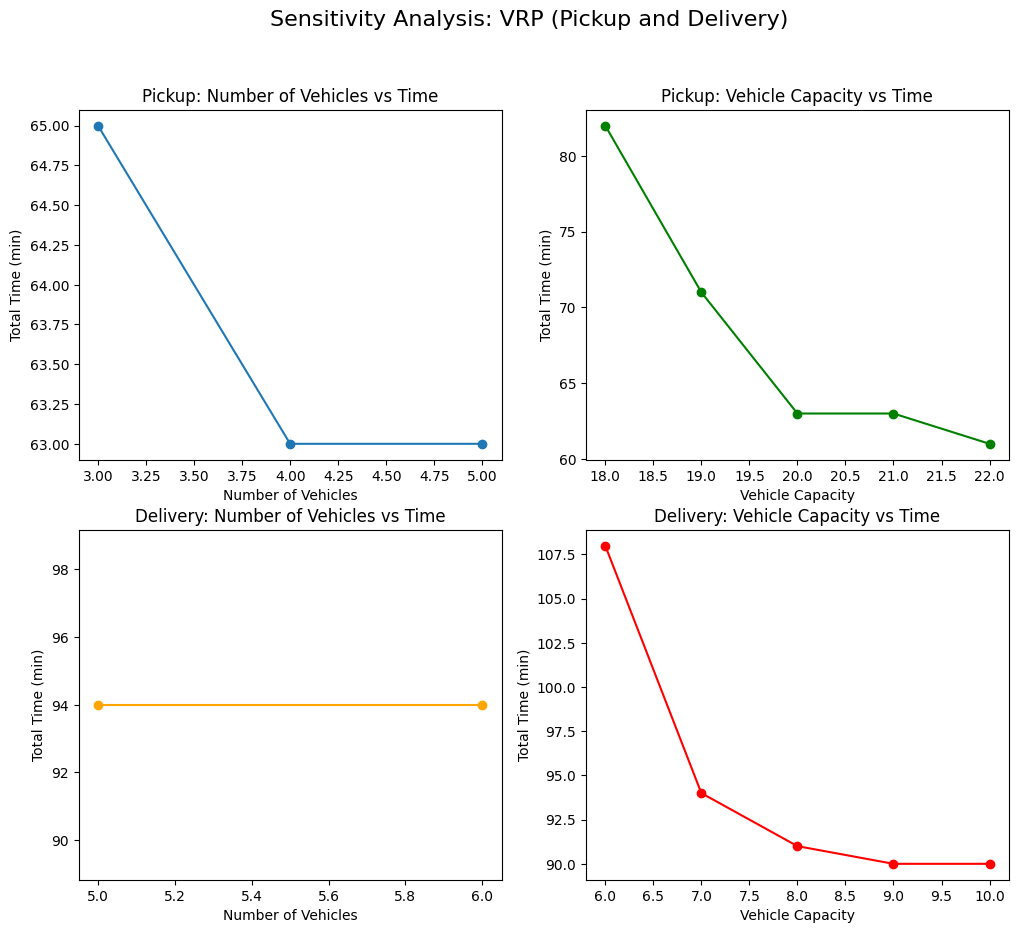

In [16]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Sensitivity Analysis: VRP (Pickup and Delivery)", fontsize=16)

# Plot Pickup - Number of Vehicles
axs[0, 0].plot(pickup_vehicles[1:], pickup_times_nv[1:], marker='o')
axs[0, 0].set_title("Pickup: Number of Vehicles vs Time")
axs[0, 0].set_xlabel("Number of Vehicles")
axs[0, 0].set_ylabel("Total Time (min)")

# Plot Pickup - Vehicle Capacity
axs[0, 1].plot(pickup_capacities, pickup_times_vc, marker='o', color='green')
axs[0, 1].set_title("Pickup: Vehicle Capacity vs Time")
axs[0, 1].set_xlabel("Vehicle Capacity")
axs[0, 1].set_ylabel("Total Time (min)")

# Plot Delivery - Number of Vehicles
axs[1, 0].plot(delivery_vehicles[1:], delivery_times_nv[1:], marker='o', color='orange')
axs[1, 0].set_title("Delivery: Number of Vehicles vs Time")
axs[1, 0].set_xlabel("Number of Vehicles")
axs[1, 0].set_ylabel("Total Time (min)")

# Plot Delivery - Vehicle Capacity
valid_cap = [c for c, t in zip(delivery_capacities, delivery_times_vc) if t is not None]
valid_times = [t for t in delivery_times_vc if t is not None]
axs[1, 1].plot(valid_cap, valid_times, marker='o', color='red')
axs[1, 1].set_title("Delivery: Vehicle Capacity vs Time")
axs[1, 1].set_xlabel("Vehicle Capacity")
axs[1, 1].set_ylabel("Total Time (min)")

In [17]:
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 640x480 with 0 Axes>

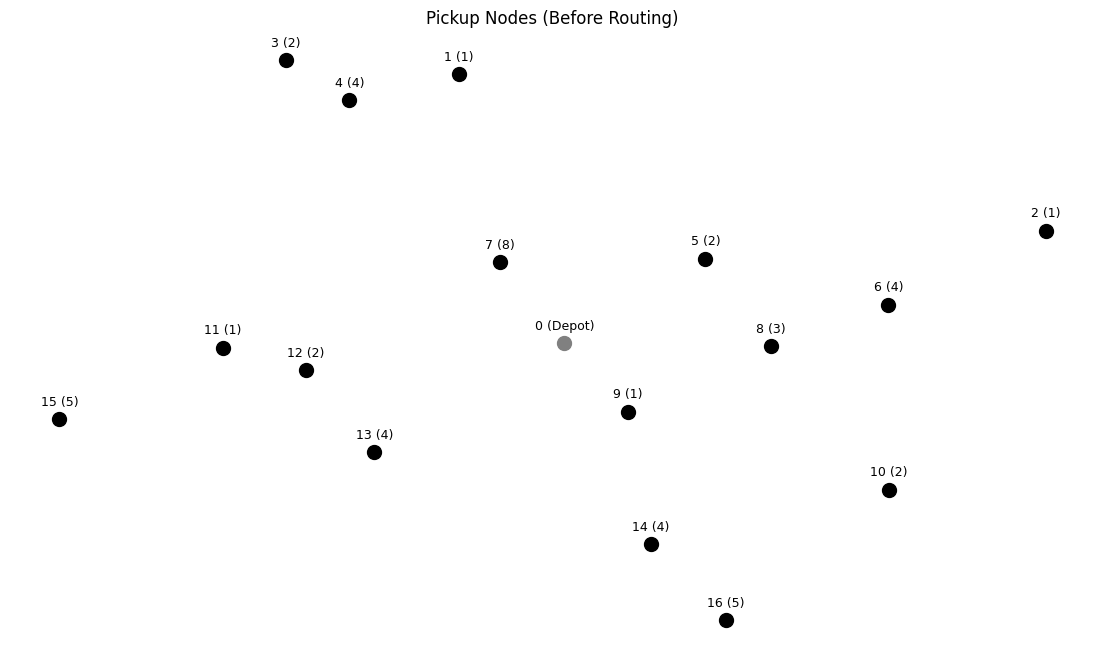

In [18]:
# Use the pickup time matrix
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(pickup_time_matrix)

# Create DataFrame with pickup routes
df = pickup_df  # Assuming you already have this from your solver

# Define vehicle colors (add more if needed)
vehicle_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Map node index to coordinates
# Swap x and y for a horizontal layout
node_positions = {i: (coord[1], coord[0]) for i, coord in enumerate(coords)}

# Plotting
plt.figure(figsize=(14, 8))
plt.title("Pickup Nodes (Before Routing)")
plt.axis("off")

# Plot nodes with labels
for node, (x, y) in node_positions.items():
    color = 'gray' if node == 0 else 'black'
    label = f"{node} (Depot)" if node == 0 else f"{node} ({pickup_demands[node]})"
    plt.plot(x, y, 'o', color=color, markersize=10)
    plt.text(x, y + 0.3, label, ha='center', fontsize=9)

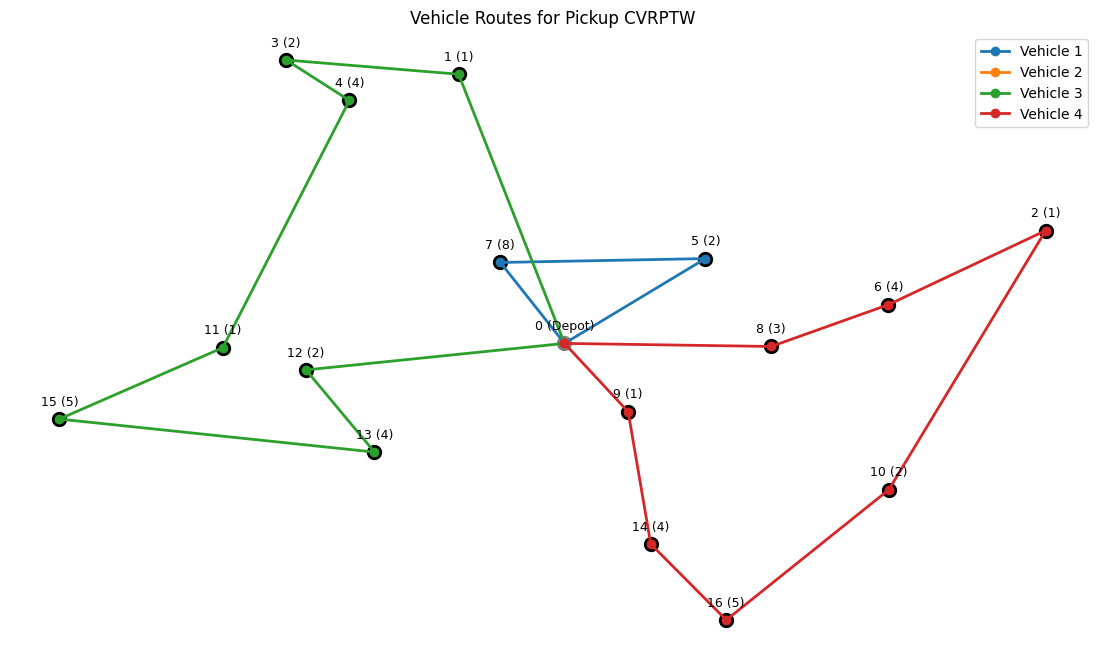

In [19]:
# Use the pickup time matrix
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(pickup_time_matrix)

# Create DataFrame with pickup routes
df = pickup_df  # Assuming you already have this from your solver

# Define vehicle colors (add more if needed)
vehicle_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Map node index to coordinates
# Swap x and y for a horizontal layout
node_positions = {i: (coord[1], coord[0]) for i, coord in enumerate(coords)}

# Plotting
plt.figure(figsize=(14, 8))
plt.title("Vehicle Routes for Pickup CVRPTW")
plt.axis("off")

# Plot nodes with labels
for node, (x, y) in node_positions.items():
    color = 'gray' if node == 0 else 'black'
    label = f"{node} (Depot)" if node == 0 else f"{node} ({pickup_demands[node]})"
    plt.plot(x, y, 'o', color=color, markersize=10)
    plt.text(x, y + 0.3, label, ha='center', fontsize=9)

# Plot vehicle routes
for vehicle_id in df['Vehicle'].unique():
    vehicle_df = df[df['Vehicle'] == vehicle_id].sort_values(by='ArrivalTime')
    route_nodes = vehicle_df['Place'].tolist()
    route_coords = [node_positions[n] for n in route_nodes]

    xs, ys = zip(*route_coords)
    plt.plot(xs, ys, marker='o', linewidth=2, color=vehicle_colors[vehicle_id - 1], label=f'Vehicle {vehicle_id}')

plt.legend()
plt.show()

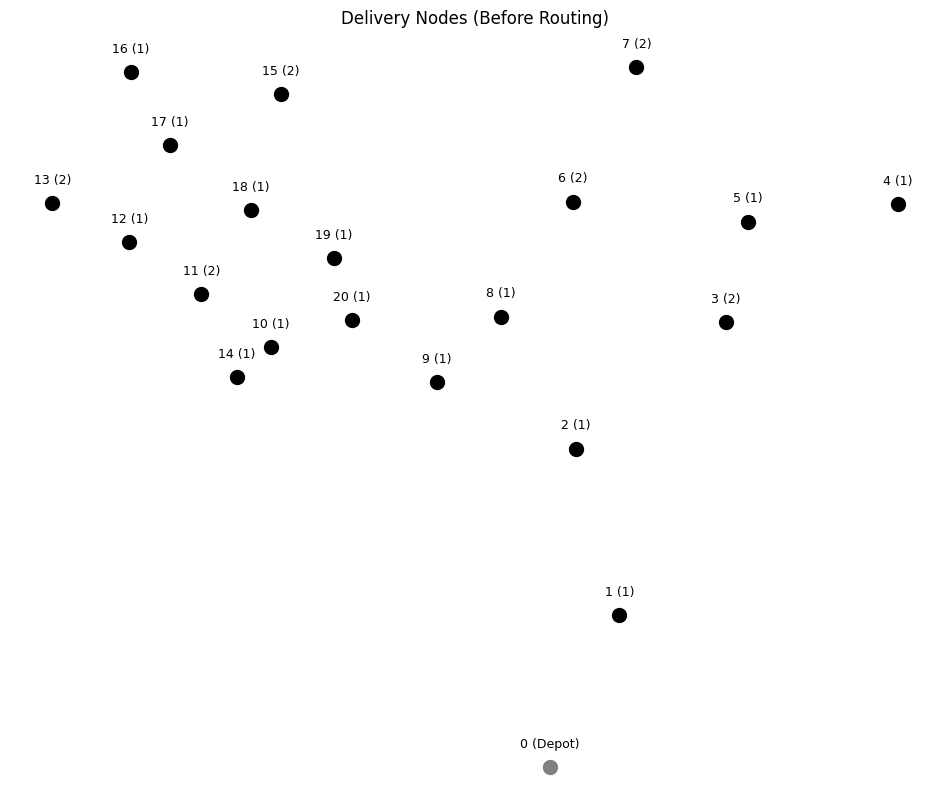

In [20]:
# Apply MDS to project distance matrix into 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(delivery_time_matrix)

# Map node index to coordinates
node_positions = {i: (coord[0], coord[1]) for i, coord in enumerate(coords)}

# Plotting
plt.figure(figsize=(12, 10))
plt.title("Delivery Nodes (Before Routing)")
plt.axis("off")

# Plot nodes only
for node, (x, y) in node_positions.items():
    color = 'gray' if node == 0 else 'black'
    label = f"{node} (Depot)" if node == 0 else f"{node} ({delivery_demands[node]})"
    plt.plot(x, y, 'o', color=color, markersize=10)
    plt.text(x, y + 0.3, label, ha='center', fontsize=9)

plt.show()

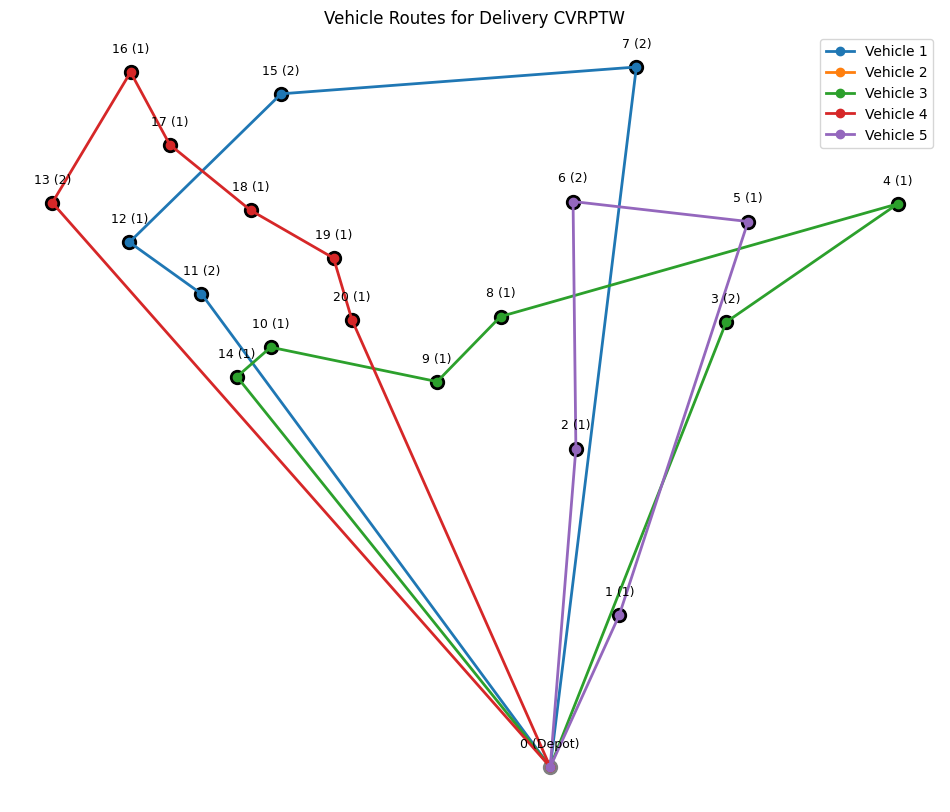

In [21]:
vehicle_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
df = delivery_df

# Apply MDS to project distance matrix into 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(delivery_time_matrix)

# Map node index to coordinates
node_positions = {i: (coord[0], coord[1]) for i, coord in enumerate(coords)}

# Plotting
plt.figure(figsize=(12, 10))
plt.title("Vehicle Routes for Delivery CVRPTW")
plt.axis("off")

# Plot nodes
# Plot all nodes with improved labels
for node, (x, y) in node_positions.items():
    color = 'gray' if node == 0 else 'black'
    label = f"{node} (Depot)" if node == 0 else f"{node} ({delivery_demands[node]})"
    plt.plot(x, y, 'o', color=color, markersize=10)
    plt.text(x, y + 0.3, label, ha='center', fontsize=9)

# Plot routes
for vehicle_id in df['Vehicle'].unique():
    vehicle_df = df[df['Vehicle'] == vehicle_id].sort_values(by='ArrivalTime')
    route_nodes = vehicle_df['Place'].tolist()
    route_coords = [node_positions[n] for n in route_nodes]

    xs, ys = zip(*route_coords)
    plt.plot(xs, ys, marker='o', linewidth=2, color=vehicle_colors[vehicle_id - 1], label=f'Vehicle {vehicle_id}')

plt.legend()
plt.show()